In [1]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

np.seed = 11
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                         np.arange(y_min, y_max, eps))

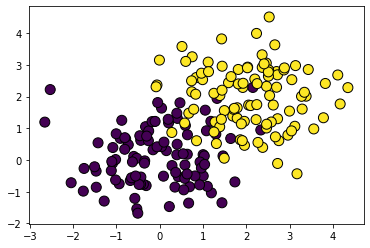

In [2]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
           edgecolors='black');

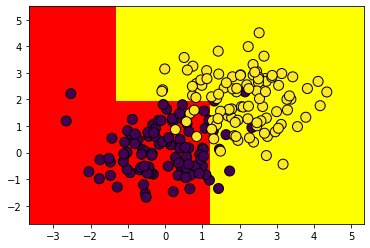

In [3]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                 random_state=11)

clf_tree.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
           edgecolors='black');

In [4]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
               out_file=dot_data, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x9b\x00\x00\x01\xf1\x08\x06\x00\x00\x00\xe3\x9b\…

In [5]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33], 
             'Fail': [1,0,1,0,1,0,0,1,1,0,1]})
data.sort_values('Age')

,Age,Fail
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [6]:
age_tree = DecisionTreeClassifier(random_state=11)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Fail'].values)
dot_data = StringIO()
export_graphviz(age_tree, feature_names=['Age'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf4\x00\x00\x03\x07\x08\x06\x00\x00\x00\xcfO\xa5…

In [7]:
data2 = pd.DataFrame({'Age':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Salary': [25,80,22,36,37,59,74,70,33,102,88], 
                      'Fail': [1,0,1,0,1,0,0,1,1,0,1]})
data2.sort_values('Salary')

,Age,Salary,Fail
2,18,22,1
0,17,25,1
8,29,33,1
3,20,36,0
4,38,37,1
5,49,59,0
7,25,70,1
6,55,74,0
1,64,80,0
10,33,88,1


In [8]:
age_sal_tree = DecisionTreeClassifier(random_state=11)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Fail'].values);

dot_data = StringIO()
export_graphviz(age_sal_tree, feature_names=['Age', 'Salary'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xfc\x00\x00\x02|\x08\x02\x00\x00\x00\x94h\x84\x0…

In [9]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def gen(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = gen(n_samples=n_train, noise=noise)
X_test, y_test = gen(n_samples=n_test, noise=noise)

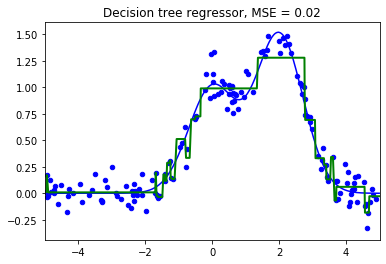

In [10]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=11)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

In [11]:
df = pd.read_csv('../../data/telecom_churn.csv')
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_hold, y_train, y_hold = train_test_split(df.values, y, 
                                                    test_size=0.3, 
                                                    random_state=11)

tree = DecisionTreeClassifier(max_depth=5, random_state=11)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train);
knn.fit(X_train, y_train);

tree_pred = tree.predict(X_hold)
knn_pred = knn.predict(X_hold)
print('tree = {0}, knn = {1}'.format(accuracy_score(y_hold, tree_pred),
                                    accuracy_score(y_hold, knn_pred)))

tree = 0.946, knn = 0.881


In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1, 11), 'max_features': range(4, 19)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, 
                        n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    3.3s finished


{'max_depth': 7, 'max_features': 12}

In [14]:
tree_grid.best_score_

0.9395566624697871

In [15]:
accuracy_score(y_hold, tree_grid.predict(X_hold))

0.942

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), 
                    ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, 
                       n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.8s finished


({'knn__n_neighbors': 5}, 0.891984266296606)

In [17]:
accuracy_score(y_hold, knn_grid.predict(X_hold))

0.886

In [18]:
dot_data = StringIO()
export_graphviz(tree_grid.best_estimator_, feature_names=df.columns, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x15*\x00\x00\x04\x1c\x08\x02\x00\x00\x00\xb3l\xf6&\x…